In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

from lint.models import Token

def token_series(token, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    total_count = sum(series.values())
    
    f_obs = np.zeros(100)
    
    for offset, count in series.items():
        f_obs[offset] = count
        
    return f_obs

In [3]:
def plot_time_slices(token, y1=1840, y2=2000, w=20):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('plasma')
    
    years = range(y1, y2, w)
    
    colors = [
        cm(1.*i/len(years))
        for i in range(len(years))
    ]
    
    ax.set_color_cycle(colors)
    
    lines = []
    for y in years:
        
        # Plot the raw series.
        Y = token_series(token, year1=y, year2=y+w)
        line, = ax.plot(Y, label=y)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
        
    print(token)
    plt.show()

In [285]:
token = 'had'

had


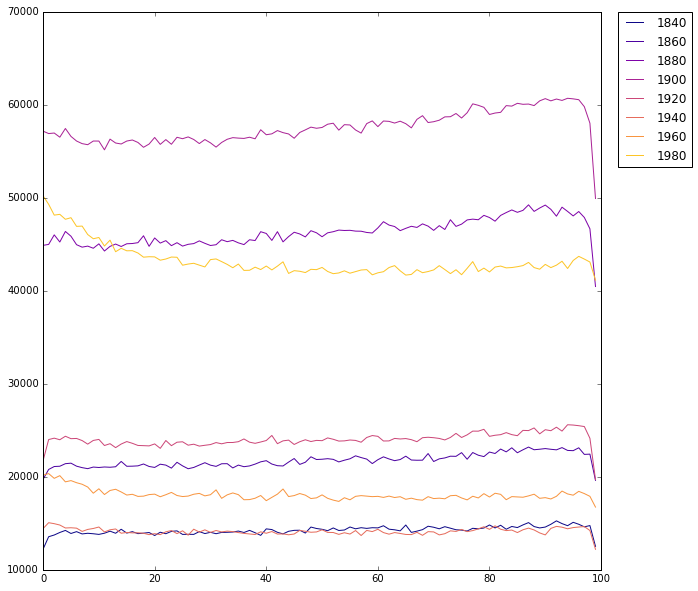

In [286]:
plot_time_slices(token)

In [373]:
series = token_series('had', year1=1960, year2=1980)

In [374]:
from numpy.random import multinomial

%time samples = multinomial(series.sum(), series/series.sum(), 1000)

CPU times: user 11.5 ms, sys: 870 µs, total: 12.3 ms
Wall time: 11.1 ms


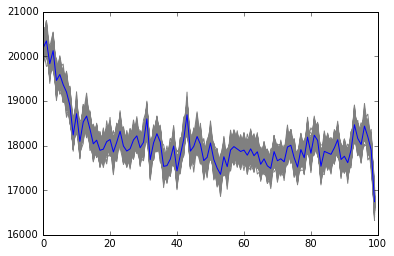

In [375]:
for s in samples:
    plt.plot(s, color='gray')

plt.plot(series)
plt.show()

In [383]:
samples[:,99].std()

125.96558875740628

In [574]:
token = 'had'

In [575]:
s1 = token_series(token, year1=1840, year2=1880)
s2 = token_series(token, year1=1980, year2=2000)

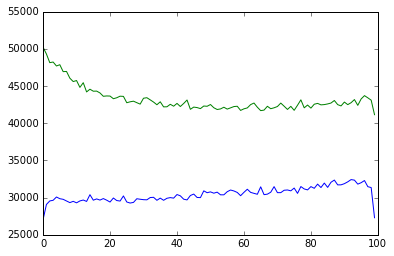

In [576]:
plt.plot(s1)
plt.plot(s2)
plt.show()

In [577]:
s1_samples = multinomial(s1.sum(), s1/s1.sum(), 1000)

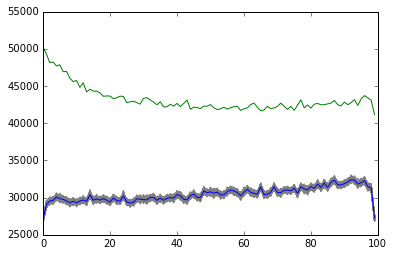

In [578]:
for s in s1_samples:
    plt.plot(s, color='gray')

plt.plot(s1)
plt.plot(s2)
    
plt.show()

In [579]:
s1_scaled_samples = s1_samples*(s2.sum()/s1.sum())

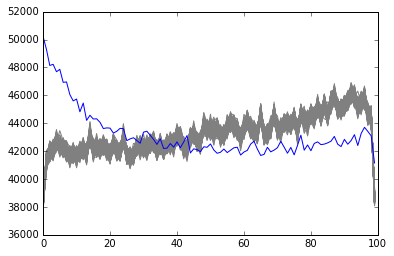

In [580]:
for s in s1_scaled_samples:
    plt.plot(s, color='gray')

plt.plot(s2)
    
plt.show()

In [581]:
zs = []
for i in range(100):
    expected = s1_scaled_samples[:,i].mean()
    std = s1_scaled_samples[:,i].std()
    observed = s2[i]
    z_score = (observed-expected)/std
    zs.append(z_score)
    
zs = np.array(zs)

abs(zs).sum()

829.20236089770492